In [1]:
# needed imports
import numpy as np
import matplotlib.pyplot as plt
from bmd import *
from bmd_biv import *
import scipy.io as sio
from numba import jit
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches

In [2]:
# sets default font parameters
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams.update({'font.size': 17})

In [3]:
# creates squares to show zoom-in
# takes in axes 'ax', small box position 'ps', small box size 'ss',
# large box position 'pl', and large box size 'sl'
def zoom_square(ax, ps, ss, pl, sl):
    ax.plot([ps[0], ps[0]],[ps[1], ps[1]+ss[1]],'-k')
    ax.plot([ps[0]+ss[0], ps[0]+ss[0]],[ps[1], ps[1]+ss[1]],'-k')  
    ax.plot([ps[0], ps[0]+ss[0]],[ps[1], ps[1]],'-k')
    ax.plot([ps[0], ps[0]+ss[0]],[ps[1]+ss[1], ps[1]+ss[1]],'-k')
    
    ax.plot([pl[0], pl[0]],[pl[1], pl[1]+sl[1]],'-k')
    ax.plot([pl[0]+sl[0], pl[0]+sl[0]],[pl[1], pl[1]+sl[1]],'-k')  
    ax.plot([pl[0], pl[0]+sl[0]],[pl[1], pl[1]],'-k')
    ax.plot([pl[0], pl[0]+sl[0]],[pl[1]+sl[1], pl[1]+sl[1]],'-k')
    
    ax.plot([ps[0]+ss[0], pl[0]],[ps[1]+ss[1], pl[1]+sl[1]],':k')
    ax.plot([ps[0]+ss[0], pl[0]],[ps[1], pl[1]],':k')

In [4]:
# color list
colors = ['#ff3322', '#ff9900', '#2277ee', '#ff9999', '#ffdd00', '#000099']
# line width
lw = 3 
# x-values
x = np.linspace(0,1,1022)

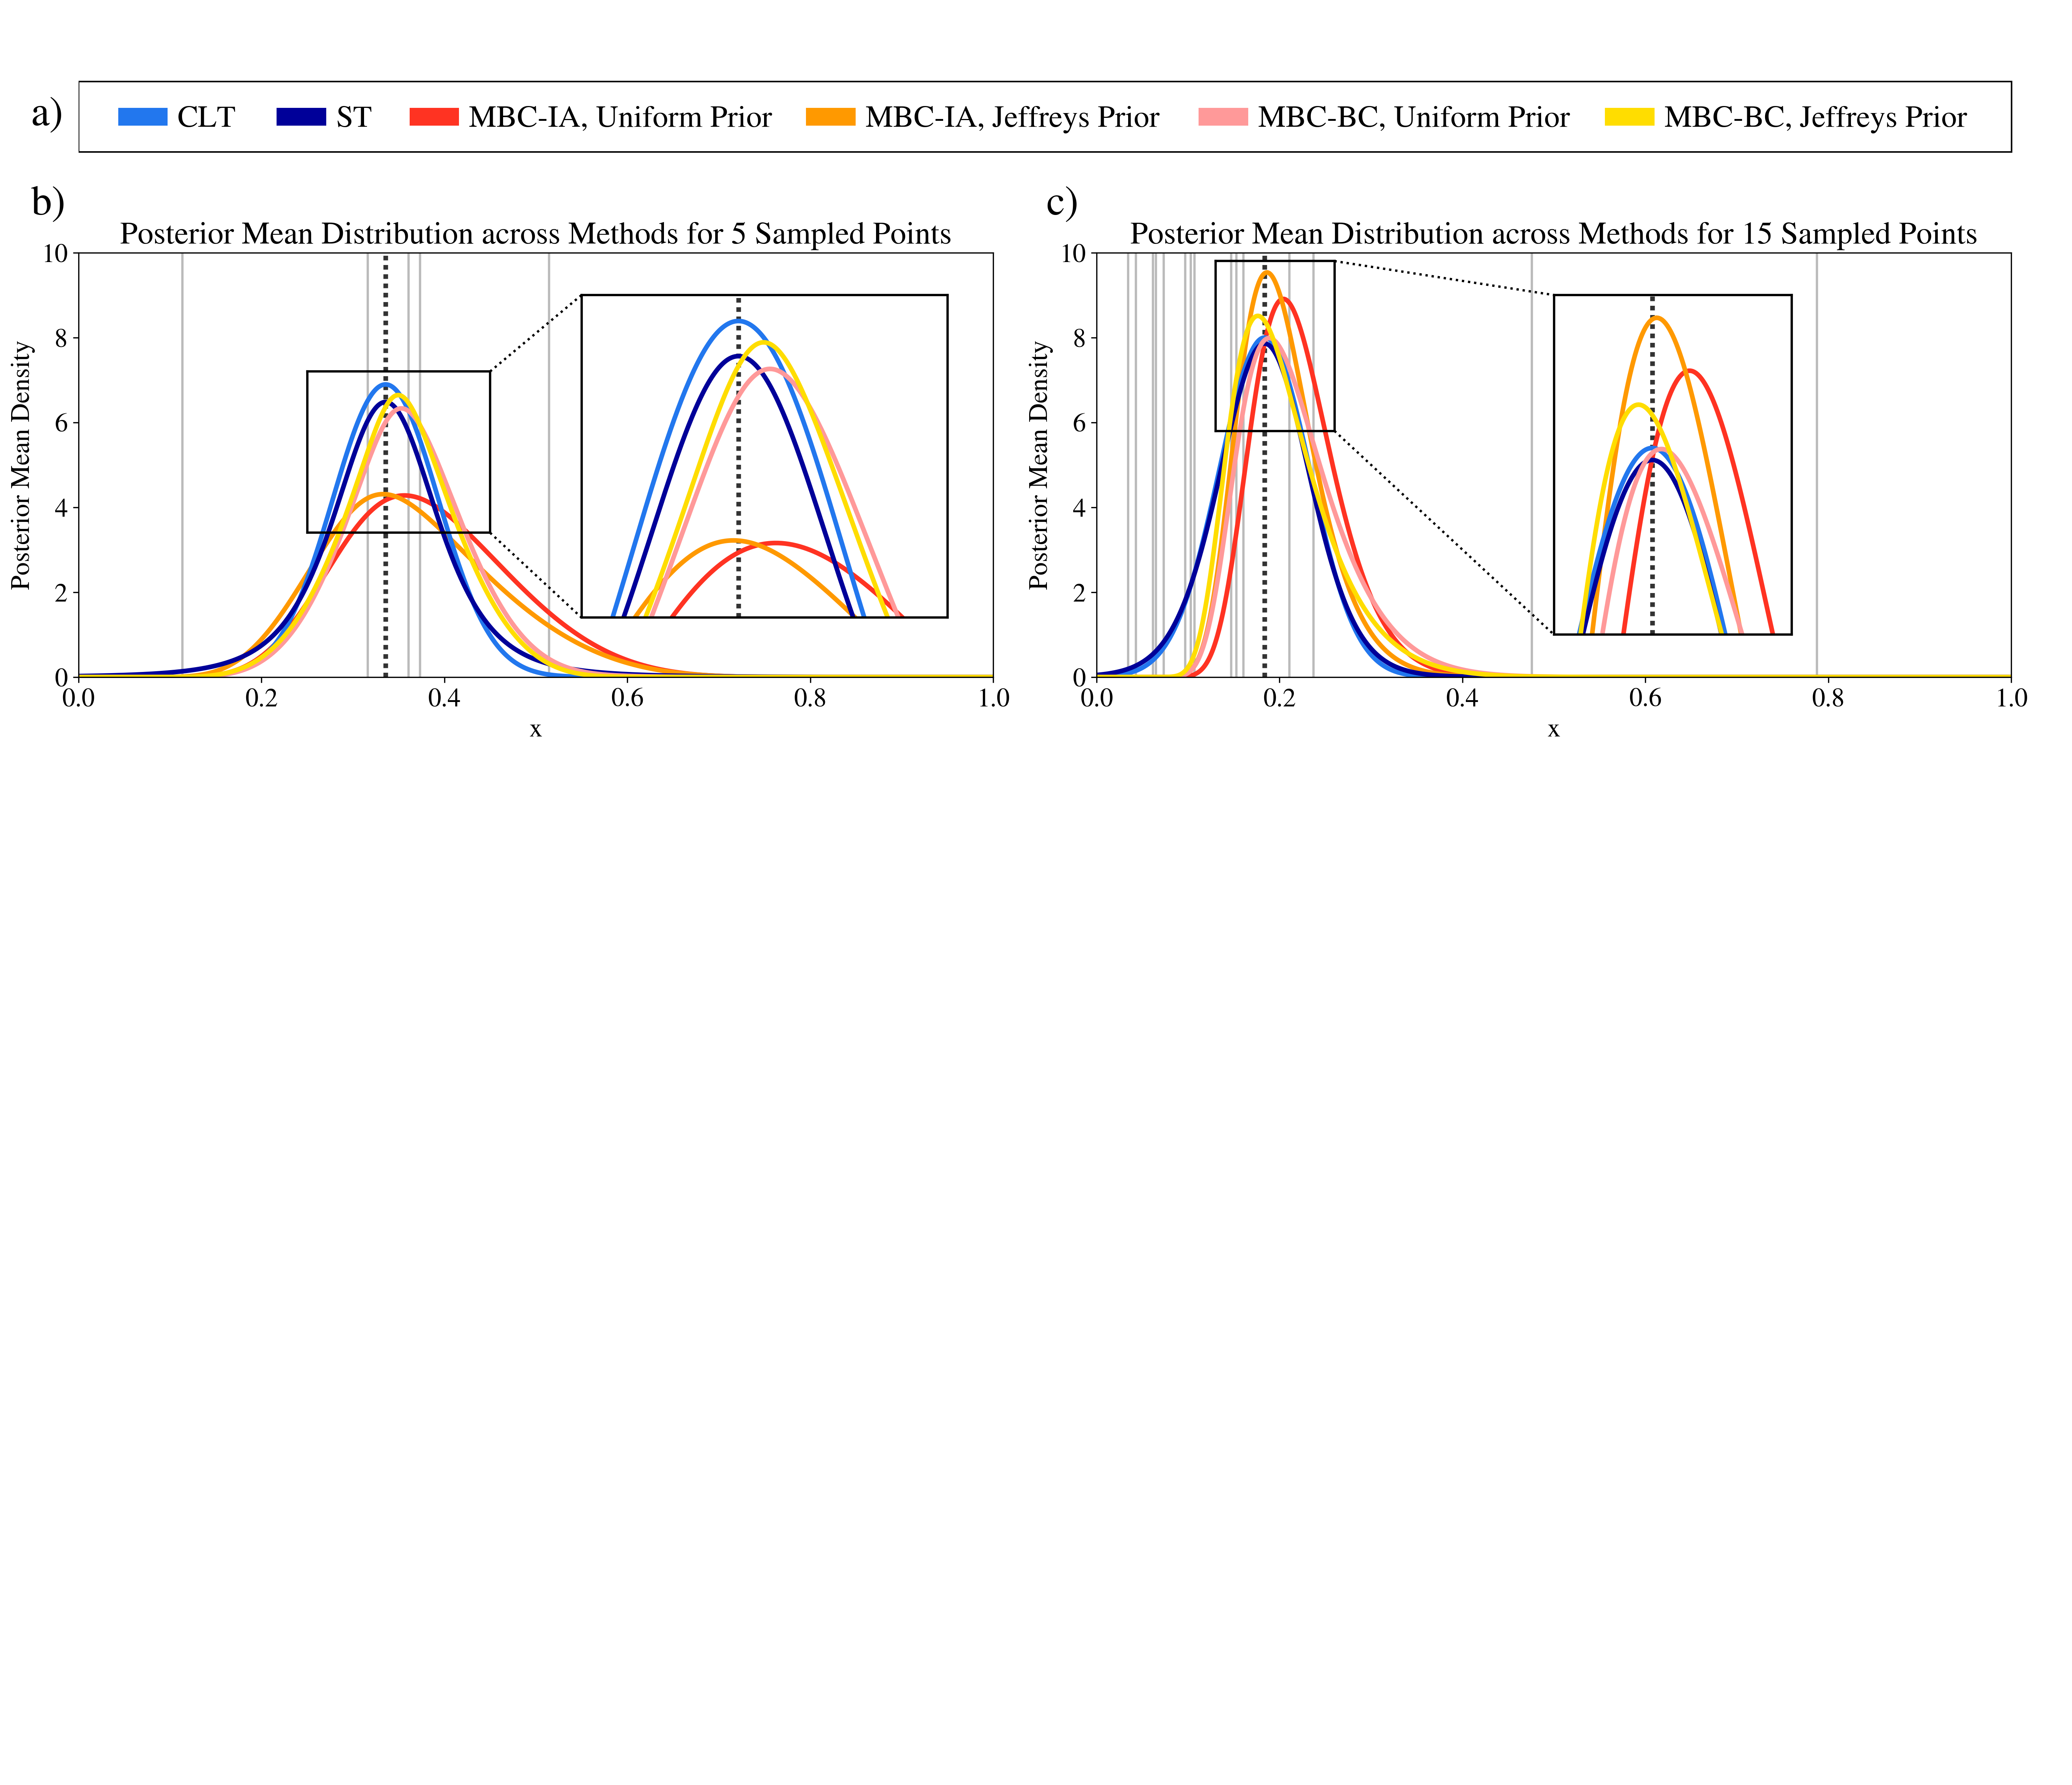

In [5]:
# sets figure/axis/grid sizes
fig, ax = plt.subplots(figsize=(23, 21), dpi=300)
ax.axis('off')
gs = GridSpec(nrows=95, ncols=80)

# SUBFIGURE A

# thin box for subfigure (a) legend
rect = patches.Rectangle((0, 0.92), 0.975, 0.04, edgecolor = 'black', facecolor = 'none',fill=False, lw=1)
ax.add_patch(rect)

# CLT legend
leg0 = 0.01
rect = patches.Rectangle((0.01+leg0, 0.935), 0.025, 0.01, edgecolor = 'none', facecolor = colors[2] ,fill=True, lw=0)
ax.add_patch(rect)
plt.text(0.04+leg0,0.9345,'CLT', fontsize=20)

# ST legend
leg0 = 0.09
rect = patches.Rectangle((0.01+leg0, 0.935), 0.025, 0.01, edgecolor = 'none', facecolor = colors[5] ,fill=True, lw=0)
ax.add_patch(rect)
plt.text(0.04+leg0,0.9345,'ST', fontsize=20)

# MBC-IA-UP legend
leg0 = 0.157
rect = patches.Rectangle((0.01+leg0, 0.935), 0.025, 0.01, edgecolor = 'none', facecolor = colors[0] ,fill=True, lw=0)
ax.add_patch(rect)
plt.text(0.04+leg0,0.9345,'MBC-IA, Uniform Prior', fontsize=20)

# MBC-IA-JP legend
leg0 = 0.357
rect = patches.Rectangle((0.01+leg0, 0.935), 0.025, 0.01, edgecolor = 'none', facecolor = colors[1] ,fill=True, lw=0)
ax.add_patch(rect)
plt.text(0.04+leg0,0.9345,'MBC-IA, Jeffreys Prior', fontsize=20)

# MBC-IA-UP legend
leg0 = 0.555
rect = patches.Rectangle((0.01+leg0, 0.935), 0.025, 0.01, edgecolor = 'none', facecolor = colors[3] ,fill=True, lw=0)
ax.add_patch(rect)
plt.text(0.04+leg0,0.9345,'MBC-BC, Uniform Prior', fontsize=20)

# MBC-IA-JP legend
leg0 = 0.76
rect = patches.Rectangle((0.01+leg0, 0.935), 0.025, 0.01, edgecolor = 'none', facecolor = colors[4] ,fill=True, lw=0)
ax.add_patch(rect)
plt.text(0.04+leg0,0.9345,'MBC-BC, Jeffreys Prior', fontsize=20)

vs = 13 # vertical spacing above row 1

# SUBFIGURE B

ax1 = fig.add_subplot(gs[0+vs:23+vs, 0:37]) # sets axes
d1 = np.array([0.1135, 0.3610, 0.3735, 0.3164, 0.5143]) # sample data
# loops over sample points to create grey sample point lines
for i in d1:
    ax1.plot([i, i], 1000*np.array([0,0.01]), '#bbb', linestyle='-')
ax1.plot(np.mean(d1)*np.ones(2), 1000*np.array([0,0.01]), '#333', linestyle=(0,(1,1)), linewidth=lw) # mean line plot
ax1.plot(x, 1022*mdist_up(d1, 10)[1], colors[0], linewidth=lw) # MBC-IA UP
ax1.plot(x, 1022*mdist_jp(d1, 10)[1],  colors[1], linewidth=lw) # MBC-IA JP
ax1.plot(x, mdist_cl(d1, 10)[1],  colors[2], linewidth=lw) # CLT
ax1.plot(x, mdist_st(d1, 10)[1],  colors[5], linewidth=lw) # ST
ax1.plot(x, 1022*mdist_biv_up(d1, 10)[1],  colors[3], linewidth=lw) # MBC-BC UP
ax1.plot(x, 1022*mdist_biv_jp(d1, 10)[1],  colors[4], linewidth=lw) # MBC-BC JP

# creates zoomed in plots
ax1.plot((2*(np.mean(d1)+(0.55-0.25))-0.55)*np.ones(2), [1.4,1.4+7.6], '#333', linestyle=(0,(1,1)), linewidth=lw, zorder=0)
d1_up_lims = [303,440]
ax1.plot(2*(x[d1_up_lims[0]:d1_up_lims[1]]+(0.55-0.25)*np.ones(len(x[d1_up_lims[0]:d1_up_lims[1]])))-0.55, 2*(1022*mdist_up(d1, 10)[1][d1_up_lims[0]:d1_up_lims[1]]+(1.4-3.4)*np.ones(len(x[d1_up_lims[0]:d1_up_lims[1]])))-1.4,  colors[0], linewidth=lw, zorder=1)
d1_jp_lims = [284,410]
ax1.plot(2*(x[d1_jp_lims[0]:d1_jp_lims[1]]+(0.55-0.25)*np.ones(len(x[d1_jp_lims[0]:d1_jp_lims[1]])))-0.55, 2*(1022*mdist_jp(d1, 10)[1][d1_jp_lims[0]:d1_jp_lims[1]]+(1.4-3.4)*np.ones(len(x[d1_jp_lims[0]:d1_jp_lims[1]])))-1.4,  colors[1], linewidth=lw, zorder=1)
d1_cl_lims = [273,415]
ax1.plot(2*(x[d1_cl_lims[0]:d1_cl_lims[1]]+(0.55-0.25)*np.ones(len(x[d1_cl_lims[0]:d1_cl_lims[1]])))-0.55, 2*(mdist_cl(d1, 10)[1][d1_cl_lims[0]:d1_cl_lims[1]]+(1.4-3.4)*np.ones(len(x[d1_cl_lims[0]:d1_cl_lims[1]])))-1.4,  colors[2], linewidth=lw, zorder=1)
d1_st_lims = [277,409]
ax1.plot(2*(x[d1_st_lims[0]:d1_st_lims[1]]+(0.55-0.25)*np.ones(len(x[d1_st_lims[0]:d1_st_lims[1]])))-0.55, 2*(mdist_st(d1, 10)[1][d1_st_lims[0]:d1_st_lims[1]]+(1.4-3.4)*np.ones(len(x[d1_st_lims[0]:d1_st_lims[1]])))-1.4,  colors[5], linewidth=lw, zorder=1)
d1_bup_lims = [292,435]
ax1.plot(2*(x[d1_bup_lims[0]:d1_bup_lims[1]]+(0.55-0.25)*np.ones(len(x[d1_bup_lims[0]:d1_bup_lims[1]])))-0.55, 2*(1022*mdist_biv_up(d1, 10)[1][d1_bup_lims[0]:d1_bup_lims[1]]+(1.4-3.4)*np.ones(len(x[d1_bup_lims[0]:d1_bup_lims[1]])))-1.4,  colors[3], linewidth=lw, zorder=1)
d1_bjp_lims = [290,427]
ax1.plot(2*(x[d1_bjp_lims[0]:d1_bjp_lims[1]]+(0.55-0.25)*np.ones(len(x[d1_bjp_lims[0]:d1_bjp_lims[1]])))-0.55, 2*(1022*mdist_biv_jp(d1, 10)[1][d1_bjp_lims[0]:d1_bjp_lims[1]]+(1.4-3.4)*np.ones(len(x[d1_bjp_lims[0]:d1_bjp_lims[1]])))-1.4,  colors[4], linewidth=lw, zorder=1)

zoom_square(ax1,[0.25,3.4],[0.2,3.8],[0.55,1.4],[0.4,7.6]) # creates zoom square 
# white square to trim excess of zoomed in plots
ax1.add_patch(patches.Rectangle((0.55, 1), 0.4, 0.4, edgecolor = 'none', facecolor = '#ffffff' ,fill=True, lw=0, zorder=2))

ax1.set_title(r'Posterior Mean Distribution across Methods for 5 Sampled Points') # add title
ax1.set_xlabel(r'x') # add x-label
ax1.set_ylabel(r'Posterior Mean Density') # add y-label
ax1.set_xlim([0,1]) # set x-limits
ax1.set_ylim([0,10]) # set y-limits

# SUBFIGURE C

ax2 = fig.add_subplot(gs[0+vs:23+vs, 78-37:78])  # sets axes
d2 = np.array([0.16062684, 0.09696376, 0.10685602, 0.23721841, 0.04288932, 0.15279138,
 0.1029383,  0.14691479, 0.06153967, 0.07345739, 0.21057786, 0.06484819,
 0.78746327, 0.47600392, 0.03428012])  # sample data
# loops over sample points to create grey sample point lines
for i in d2:
    ax2.plot([i, i], 1000*np.array([0,0.01]), '#bbb', linestyle='-')
ax2.plot(np.mean(d2)*np.ones(2), 1000*np.array([0,0.01]), '#333', linestyle=(0,(1,1)), linewidth=lw) # mean line plot
ax2.plot(x, 1022*mdist_up(d2, 10)[1], colors[0], linewidth=lw) # MBC-IA UP
ax2.plot(x, 1022*mdist_jp(d2, 10)[1],  colors[1], linewidth=lw) # MBC-IA JP
ax2.plot(x, mdist_cl(d2, 10)[1],  colors[2], linewidth=lw) # CLT
ax2.plot(x, mdist_st(d2, 10)[1],  colors[5], linewidth=lw) # ST
ax2.plot(x, 1022*mdist_biv_up(d2, 10)[1],  colors[3], linewidth=lw) # MBC-BC UP
ax2.plot(x, 1022*mdist_biv_jp(d2, 10)[1],  colors[4], linewidth=lw) # MBC-BC JP

# creates zoomed in plots
ax2.plot((2*(np.mean(d2)+(0.5-0.13))-0.5)*np.ones(2), [1,1+8], '#333', linestyle=(0,(1,1)), linewidth=lw, zorder=0)
d2_up_lims = [171,257]
ax2.plot(2*(x[d2_up_lims[0]:d2_up_lims[1]]+(0.5-0.13)*np.ones(len(x[d2_up_lims[0]:d2_up_lims[1]])))-0.5, 2*(1022*mdist_up(d2, 10)[1][d2_up_lims[0]:d2_up_lims[1]]+(1-5.8)*np.ones(len(x[d2_up_lims[0]:d2_up_lims[1]])))-1,  colors[0], linewidth=lw, zorder=1)
d2_jp_lims = [154,239]
ax2.plot(2*(x[d2_jp_lims[0]:d2_jp_lims[1]]+(0.5-0.13)*np.ones(len(x[d2_jp_lims[0]:d2_jp_lims[1]])))-0.5, 2*(1022*mdist_jp(d2, 10)[1][d2_jp_lims[0]:d2_jp_lims[1]]+(1-5.8)*np.ones(len(x[d2_jp_lims[0]:d2_jp_lims[1]])))-1,  colors[1], linewidth=lw, zorder=1)
d2_cl_lims = [147,230]
ax2.plot(2*(x[d2_cl_lims[0]:d2_cl_lims[1]]+(0.5-0.13)*np.ones(len(x[d2_cl_lims[0]:d2_cl_lims[1]])))-0.5, 2*(mdist_cl(d2, 10)[1][d2_cl_lims[0]:d2_cl_lims[1]]+(1-5.8)*np.ones(len(x[d2_cl_lims[0]:d2_cl_lims[1]])))-1,  colors[2], linewidth=lw, zorder=1)
d2_st_lims = [148,229]
ax2.plot(2*(x[d2_st_lims[0]:d2_st_lims[1]]+(0.5-0.13)*np.ones(len(x[d2_st_lims[0]:d2_st_lims[1]])))-0.5, 2*(mdist_st(d2, 10)[1][d2_st_lims[0]:d2_st_lims[1]]+(1-5.8)*np.ones(len(x[d2_st_lims[0]:d2_st_lims[1]])))-1,  colors[5], linewidth=lw, zorder=1)
d2_bup_lims = [160,239]
ax2.plot(2*(x[d2_bup_lims[0]:d2_bup_lims[1]]+(0.5-0.13)*np.ones(len(x[d2_bup_lims[0]:d2_bup_lims[1]])))-0.5, 2*(1022*mdist_biv_up(d2, 10)[1][d2_bup_lims[0]:d2_bup_lims[1]]+(1-5.8)*np.ones(len(x[d2_bup_lims[0]:d2_bup_lims[1]])))-1,  colors[3], linewidth=lw, zorder=1)
d2_bjp_lims = [147,229]
ax2.plot(2*(x[d2_bjp_lims[0]:d2_bjp_lims[1]]+(0.5-0.13)*np.ones(len(x[d2_bjp_lims[0]:d2_bjp_lims[1]])))-0.5, 2*(1022*mdist_biv_jp(d2, 10)[1][d2_bjp_lims[0]:d2_bjp_lims[1]]+(1-5.8)*np.ones(len(x[d2_bjp_lims[0]:d2_bjp_lims[1]])))-1,  colors[4], linewidth=lw, zorder=1)

zoom_square(ax2,[0.13,5.8],[0.13,4],[0.5,1],[0.26,8]) # creates zoom square
# white square to trim excess of zoomed in plots
ax2.add_patch(patches.Rectangle((0.5, 0.6), 0.26, 0.4, edgecolor = 'none', facecolor = '#ffffff' ,fill=True, lw=0, zorder=2))

ax2.set_title(r'Posterior Mean Distribution across Methods for 15 Sampled Points') # add title
ax2.set_xlabel(r'x') # add x-label
ax2.set_ylabel(r'Posterior Mean Density') # add y-label
ax2.set_xlim([0,1]) # set x-limits
ax2.set_ylim([0,10]) # set x-limits

# Labels for letters a) - c)
plt.text(-1.165,13,'a)', fontsize=27)
plt.text(-1.165, 10.9,'b)', fontsize=27)
plt.text(-0.055,10.9,'c)', fontsize=27)

plt.show() # show plot